## Supervised Learning - Predicting Car Prices

## Import Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Load the dataset

In [11]:
df = pd.read_csv("car_price_dataset.csv")

## Clean and preprocess

In [12]:
df['Brand'] = df['Brand'].str.strip().str.title()
df['Model'] = df['Model'].str.strip().str.upper()
df['Fuel_Type'] = df['Fuel_Type'].str.strip().str.capitalize()
df['Transmission'] = df['Transmission'].str.strip().str.capitalize()

## Drop model due to high cardinality

In [13]:
X = df.drop(columns=["Price", "Model"])
y = df["Price"]

## One-hot encode categorical variables

In [14]:
X_encoded = pd.get_dummies(X, columns=["Brand", "Fuel_Type", "Transmission"], drop_first=True)

## Split the data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## Train Linear Regression

In [16]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)

## Train Random Forest

In [17]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## Evaluation

In [18]:
import numpy as np

print("Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("R2 Score:", r2_score(y_test, y_pred_lin))

print("\nRandom Forest:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Linear Regression:
RMSE: 64.77468360086043
R2 Score: 0.9995433341795983

Random Forest:
RMSE: 523.7639248508817
R2 Score: 0.9701421128891045


## Feature Importance Plot (Random Forest)

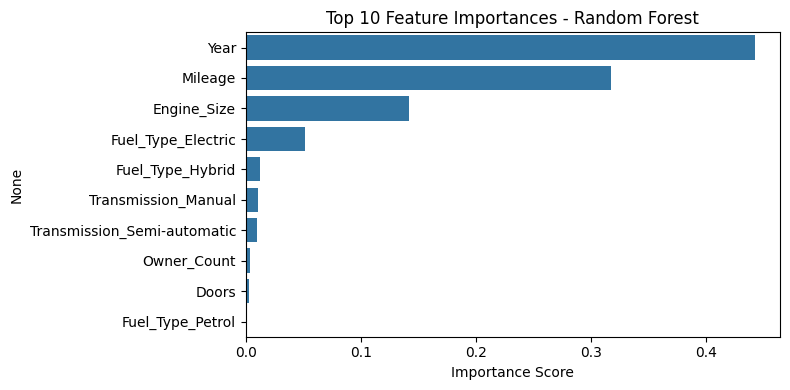

In [19]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=importances.values[:10], y=importances.index[:10])
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("feature_importance_rf.png")
plt.show()